In [11]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from pathlib import Path
import os

SyntaxError: EOL while scanning string literal (<ipython-input-10-2393d18dcf18>, line 1)

In [12]:
train = pd.read_csv('/Users/admin/Desktop/House price/train.csv')
test = pd.read_csv('/Users/admin/Desktop/House price/test.csv')

In [13]:
train.shape, test.shape
train.head(20)
train.count()


Id;MSSubClass;MSZoning;LotFrontage;LotArea;Street;Alley;LotShape;LandContour;Utilities;LotConfig;LandSlope;Neighborhood;Condition1;Condition2;BldgType;HouseStyle;OverallQual;OverallCond;YearBuilt;YearRemodAdd;RoofStyle;RoofMatl;Exterior1st;Exterior2nd;MasVnrType;MasVnrArea;ExterQual;ExterCond;Foundation;BsmtQual;BsmtCond;BsmtExposure;BsmtFinType1;BsmtFinSF1;BsmtFinType2;BsmtFinSF2;BsmtUnfSF;TotalBsmtSF;Heating;HeatingQC;CentralAir;Electrical;1stFlrSF;2ndFlrSF;LowQualFinSF;GrLivArea;BsmtFullBath;BsmtHalfBath;FullBath;HalfBath;BedroomAbvGr;KitchenAbvGr;KitchenQual;TotRmsAbvGrd;Functional;Fireplaces;FireplaceQu;GarageType;GarageYrBlt;GarageFinish;GarageCars;GarageArea;GarageQual;GarageCond;PavedDrive;WoodDeckSF;OpenPorchSF;EnclosedPorch;3SsnPorch;ScreenPorch;PoolArea;PoolQC;Fence;MiscFeature;MiscVal;MoSold;YrSold;SaleType;SaleCondition;SalePrice    1460
dtype: int64

In [14]:
train.describe(include = "all")


,Id;MSSubClass;MSZoning;LotFrontage;LotArea;Street;Alley;LotShape;LandContour;Utilities;LotConfig;LandSlope;Neighborhood;Condition1;Condition2;BldgType;HouseStyle;OverallQual;OverallCond;YearBuilt;YearRemodAdd;RoofStyle;RoofMatl;Exterior1st;Exterior2nd;MasVnrType;MasVnrArea;ExterQual;ExterCond;Foundation;BsmtQual;BsmtCond;BsmtExposure;BsmtFinType1;BsmtFinSF1;BsmtFinType2;BsmtFinSF2;BsmtUnfSF;TotalBsmtSF;Heating;HeatingQC;CentralAir;Electrical;1stFlrSF;2ndFlrSF;LowQualFinSF;GrLivArea;BsmtFullBath;BsmtHalfBath;FullBath;HalfBath;BedroomAbvGr;KitchenAbvGr;KitchenQual;TotRmsAbvGrd;Functional;Fireplaces;FireplaceQu;GarageType;GarageYrBlt;GarageFinish;GarageCars;GarageArea;GarageQual;GarageCond;PavedDrive;WoodDeckSF;OpenPorchSF;EnclosedPorch;3SsnPorch;ScreenPorch;PoolArea;PoolQC;Fence;MiscFeature;MiscVal;MoSold;YrSold;SaleType;SaleCondition;SalePrice
count,1460
unique,1460
top,237;20;RL;65;8773;Pave;NA;Reg;Lvl;AllPub;FR2;G...
freq,1


In [5]:
#Identification et traitement des valeurs manquantes

train.isnull()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [6]:
#compte les valeurs manquantes dans 
train.isnull().sum().sum(),test.isnull().sum().sum()




(6965, 7000)

In [7]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
#on sépare la variable dépendante des variables explicatives

y = train.SalePrice
X = train.drop(columns=["SalePrice"], axis=1)

In [9]:
y.shape, X.shape, test.shape


((1460,), (1460, 80), (1459, 80))

In [10]:
X['Type'] = 'train'
test['Type'] = 'test'
data = X.append(test)

In [11]:
data.isnull().sum().sum()

13965

In [12]:
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Type
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,train


In [13]:
# on créer un objet qui contient toute les variables qui comprennent des valeurs nulles


columns_having_null_values = data[data.columns[data.isnull().sum()>0]]
columns_having_null_values

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
1,RL,80.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
2,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
3,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
4,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,WD
1455,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,1970.0,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN,WD
1456,RL,160.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,1960.0,Unf,2.0,576.0,TA,TA,NaN,NaN,NaN,WD
1457,RL,62.0,NaN,AllPub,HdBoard,Wd Shng,None,0.0,Gd,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,MnPrv,Shed,WD


In [14]:
#on remplace les valeurs manquantes 
#pour les variables quali, on remplace les NA, ou les 0, par une autre modalité, car sinon ca fait buguer le modèle 
#pour les variables quanti, c'est du

data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)

data['Electrical'].fillna("SBrkr", inplace=True)
data['MSZoning'].fillna("RL",inplace=True)
data['Alley'].fillna("Nothing", inplace=True)
data['Utilities'].fillna("Unknow", inplace=True)
data['Exterior1st'].fillna("Unknow", inplace=True)
data['Exterior2nd'].fillna("Unknow", inplace=True)


data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)


data['MasVnrType'].fillna("None", inplace=True)
data['BsmtCond'].fillna("None", inplace=True)
data['BsmtExposure'].fillna("None", inplace=True)
data['BsmtFinType1'].fillna("None", inplace=True)
data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean(), inplace=True)
data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean(), inplace=True)
data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean(), inplace=True)
data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean(), inplace=True)



data['BsmtFullBath'].fillna(0.0, inplace=True)
data['BsmtHalfBath'].fillna(0.0, inplace=True)
data['KitchenQual'].fillna("TA", inplace=True)
data['Functional'].fillna("Typ", inplace=True)
data['FireplaceQu'].fillna("None", inplace=True)
data['GarageType'].fillna("None", inplace=True)
data['GarageYrBlt'].fillna(0, inplace=True)
data['GarageFinish'].fillna("No", inplace=True)
data['GarageCars'].fillna(0, inplace=True)
data['GarageArea'].fillna(0, inplace=True)
data['GarageQual'].fillna("None", inplace=True)
data['GarageCond'].fillna("None", inplace=True)
data['PoolQC'].fillna("None", inplace=True)
data['Fence'].fillna("None", inplace=True)
data['MiscFeature'].fillna("None", inplace=True)
data['SaleType'].fillna("Unknown", inplace=True)
data['SaleCondition'].fillna("Unknown", inplace=True)
data['BsmtQual'].fillna("None", inplace=True)
data['BsmtFinType2'].fillna("None", inplace=True)

In [15]:
data.isnull().sum().sum()


0

In [16]:
v=data.var()

print(v)
type(v)

Id               7.102900e+05
MSSubClass       1.807749e+03
LotFrontage      4.542161e+02
LotArea          6.220471e+07
OverallQual      1.987951e+00
OverallCond      1.239060e+00
YearBuilt        9.175714e+02
YearRemodAdd     4.365736e+02
MasVnrArea       3.190728e+04
BsmtFinSF1       2.075101e+05
BsmtFinSF2       2.862073e+04
BsmtUnfSF        1.931324e+05
TotalBsmtSF      1.942083e+05
1stFlrSF         1.539480e+05
2ndFlrSF         1.837849e+05
LowQualFinSF     2.152665e+03
GrLivArea        2.560877e+05
BsmtFullBath     2.752853e-01
BsmtHalfBath     6.032327e-02
FullBath         3.057750e-01
HalfBath         2.528798e-01
BedroomAbvGr     6.768239e-01
KitchenAbvGr     4.599395e-02
TotRmsAbvGrd     2.462951e+00
Fireplaces       4.174831e-01
GarageYrBlt      2.022178e+05
GarageCars       5.809420e-01
GarageArea       4.645563e+04
WoodDeckSF       1.600898e+04
OpenPorchSF      4.566447e+03
EnclosedPorch    4.127323e+03
3SsnPorch        6.344439e+02
ScreenPorch      3.156683e+03
PoolArea  

pandas.core.series.Series

In [23]:
corr_matrix_quanti = data.drop(columns=["MSSubClass","MSZoning","Street","Alley","LotShape",'LandContour',"Utilities","LotConfig","LandSlope","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond","YearBuilt","YearRemodAdd","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Functional","Fireplaces","FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageQual","GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","YrSold","SaleType","SaleCondition","Id"], axis=1)
corr_matrix_quanti.head(10)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Type
0,65.000000,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,...,548.0,0,61,0,0,0,0,0,2,train
1,80.000000,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,...,460.0,298,0,0,0,0,0,0,5,train
2,68.000000,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,...,608.0,0,42,0,0,0,0,0,9,train
3,60.000000,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,...,642.0,0,35,272,0,0,0,0,2,train
4,84.000000,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,...,836.0,192,84,0,0,0,0,0,12,train
5,85.000000,14115,0.0,732.0,0.0,64.0,796.0,796,566,0,...,480.0,40,30,0,320,0,0,700,10,train
6,75.000000,10084,186.0,1369.0,0.0,317.0,1686.0,1694,0,0,...,636.0,255,57,0,0,0,0,0,8,train
7,69.305795,10382,240.0,859.0,32.0,216.0,1107.0,1107,983,0,...,484.0,235,204,228,0,0,0,350,11,train
8,51.000000,6120,0.0,0.0,0.0,952.0,952.0,1022,752,0,...,468.0,90,0,205,0,0,0,0,4,train
9,50.000000,7420,0.0,851.0,0.0,140.0,991.0,1077,0,0,...,205.0,0,4,0,0,0,0,0,1,train


In [24]:
corr_matrix_quanti = corr_matrix_quanti.corr()
corr_matrix_quanti

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
LotFrontage,1.000000,0.364382,0.202210,0.203603,0.041396,0.104971,0.331031,0.424147,0.023842,0.004669,0.349484,0.339380,0.106380,0.152160,0.010541,0.025255,0.069348,0.160857,0.035762,0.010337
LotArea,0.364382,1.000000,0.125354,0.194021,0.084055,0.021361,0.254125,0.332460,0.031515,0.000554,0.284519,0.213180,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156
MasVnrArea,0.202210,0.125354,1.000000,0.301999,-0.015633,0.089712,0.395632,0.393761,0.120454,-0.057910,0.402032,0.372988,0.165839,0.143659,-0.111156,0.013611,0.065188,0.004512,0.044810,-0.000117
BsmtFinSF1,0.203603,0.194021,0.301999,1.000000,-0.055045,-0.477404,0.536467,0.458056,-0.162284,-0.066028,0.211617,0.309972,0.223471,0.124153,-0.099710,0.050908,0.096821,0.084462,0.093295,-0.000942
BsmtFinSF2,0.041396,0.084055,-0.015633,-0.055045,1.000000,-0.238241,0.089410,0.084323,-0.097734,-0.004923,-0.017867,0.003356,0.098389,-0.005875,0.032739,-0.023279,0.063301,0.044524,-0.005139,-0.009592
BsmtUnfSF,0.104971,0.021361,0.089712,-0.477404,-0.238241,1.000000,0.412285,0.296577,-0.000376,0.046913,0.233931,0.164669,-0.039298,0.119753,0.005006,-0.005810,-0.049157,-0.032273,-0.010492,0.022604
TotalBsmtSF,0.331031,0.254125,0.395632,0.536467,0.089410,0.412285,1.000000,0.801608,-0.205643,-0.023359,0.445167,0.485912,0.229579,0.245500,-0.085508,0.037892,0.075362,0.072216,0.084001,0.017886
1stFlrSF,0.424147,0.332460,0.393761,0.458056,0.084323,0.296577,0.801608,1.000000,-0.249823,-0.012704,0.562538,0.491996,0.227347,0.238502,-0.065796,0.044086,0.098381,0.121900,0.093062,0.040143
2ndFlrSF,0.023842,0.031515,0.120454,-0.162284,-0.097734,-0.000376,-0.205643,-0.249823,1.000000,0.017803,0.655085,0.127464,0.089922,0.185387,0.054645,-0.032458,0.011070,0.044503,-0.005299,0.014185
LowQualFinSF,0.004669,0.000554,-0.057910,-0.066028,-0.004923,0.046913,-0.023359,-0.012704,0.017803,1.000000,0.096916,-0.053431,-0.015622,-0.000692,0.087212,-0.004545,0.006835,0.035177,-0.005973,0.011528


In [25]:
upper_matrix_quanti = corr_matrix_quanti.where(np.triu(np.ones(corr_matrix_quanti.shape),k=1).astype(np.bool))
upper_matrix_quanti

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
LotFrontage,NaN,0.364382,0.202210,0.203603,0.041396,0.104971,0.331031,0.424147,0.023842,0.004669,0.349484,0.339380,0.106380,0.152160,0.010541,0.025255,0.069348,0.160857,0.035762,0.010337
LotArea,NaN,NaN,0.125354,0.194021,0.084055,0.021361,0.254125,0.332460,0.031515,0.000554,0.284519,0.213180,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156
MasVnrArea,NaN,NaN,NaN,0.301999,-0.015633,0.089712,0.395632,0.393761,0.120454,-0.057910,0.402032,0.372988,0.165839,0.143659,-0.111156,0.013611,0.065188,0.004512,0.044810,-0.000117
BsmtFinSF1,NaN,NaN,NaN,NaN,-0.055045,-0.477404,0.536467,0.458056,-0.162284,-0.066028,0.211617,0.309972,0.223471,0.124153,-0.099710,0.050908,0.096821,0.084462,0.093295,-0.000942
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,-0.238241,0.089410,0.084323,-0.097734,-0.004923,-0.017867,0.003356,0.098389,-0.005875,0.032739,-0.023279,0.063301,0.044524,-0.005139,-0.009592
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,0.412285,0.296577,-0.000376,0.046913,0.233931,0.164669,-0.039298,0.119753,0.005006,-0.005810,-0.049157,-0.032273,-0.010492,0.022604
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.801608,-0.205643,-0.023359,0.445167,0.485912,0.229579,0.245500,-0.085508,0.037892,0.075362,0.072216,0.084001,0.017886
1stFlrSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.249823,-0.012704,0.562538,0.491996,0.227347,0.238502,-0.065796,0.044086,0.098381,0.121900,0.093062,0.040143
2ndFlrSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017803,0.655085,0.127464,0.089922,0.185387,0.054645,-0.032458,0.011070,0.044503,-0.005299,0.014185
LowQualFinSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096916,-0.053431,-0.015622,-0.000692,0.087212,-0.004545,0.006835,0.035177,-0.005973,0.011528


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


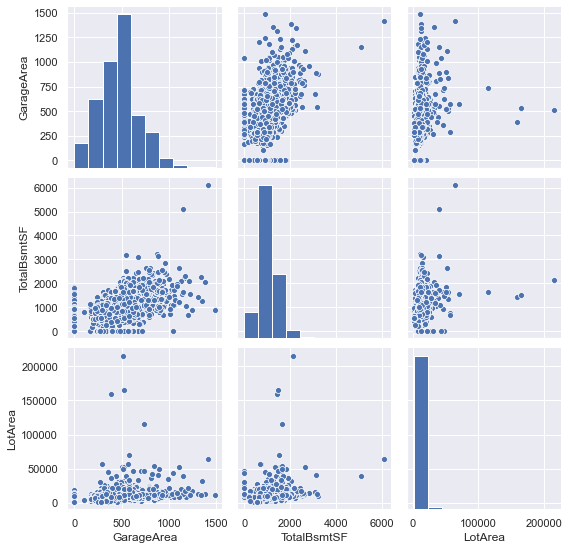

In [51]:
#graphiques de distribution et de corrélation entre 3 variables quanti

sns.set()
cols = ['GarageArea', 'TotalBsmtSF', 'LotArea']
sns.pairplot(data[cols], size = 2.5)
plt.show();

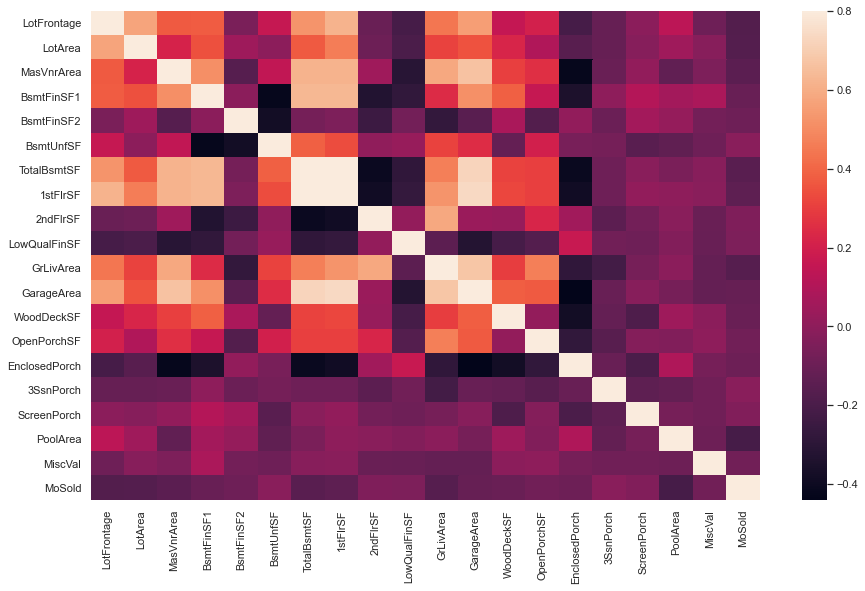

In [52]:
#Correlation matrice

corrmatrix = corr_matrix_quanti.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corrmatrix, vmax=.8, square=False);

In [26]:
#Pour vérifier si on bien toute nos variables quanti dans le nouvel objet
upper_matrix_quanti.dtypes

LotFrontage      float64
LotArea          float64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF         float64
2ndFlrSF         float64
LowQualFinSF     float64
GrLivArea        float64
GarageArea       float64
WoodDeckSF       float64
OpenPorchSF      float64
EnclosedPorch    float64
3SsnPorch        float64
ScreenPorch      float64
PoolArea         float64
MiscVal          float64
MoSold           float64
dtype: object

In [27]:
#révele les variables qui disposent de coef de corrélation >70%
drop_columns1 = [col for col in upper_matrix_quanti.columns if any(upper_matrix_quanti[col] > 0.70)]
drop_columns1

['1stFlrSF']

In [28]:
data.drop(data[drop_columns1], axis=1, inplace=True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Type
0,1,60,RL,65.0,8450,Pave,Nothing,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,train
1,2,20,RL,80.0,9600,Pave,Nothing,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,train
2,3,60,RL,68.0,11250,Pave,Nothing,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,train
3,4,70,RL,60.0,9550,Pave,Nothing,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,train
4,5,60,RL,84.0,14260,Pave,Nothing,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,train


In [29]:
#recodage des variables quali
object_columnns = data[data.columns[data.dtypes=='object']]
object_columnns.columns


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Type'],
      dtype='object')

In [30]:
for i in object_columnns:
    label = LabelEncoder()
    label.fit(data[i].values)
    data[i] = label.transform(data[i].values)

In [31]:
int_columns = data[data.columns[data.dtypes=='int']]
int_columns.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleC

In [32]:
#une fois que tout est clean on re partionne notre jeu de donnée

X_ = data[data.Type==1]
X_ = X_.drop(["Type"], axis=1)

test_ = data[data.Type==0]
test_ = test_.drop(["Type"], axis=1)

test_.head(), test_.describe


(     Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
 0  1461          20         2         80.0    11622       1      1         3   
 1  1462          20         3         81.0    14267       1      1         0   
 2  1463          60         3         74.0    13830       1      1         0   
 3  1464          60         3         78.0     9978       1      1         0   
 4  1465         120         3         43.0     5005       1      1         0   
 
    LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
 0            3          0  ...          120         0       3      2   
 1            3          0  ...            0         0       3      4   
 2            3          0  ...            0         0       3      2   
 3            3          0  ...            0         0       3      4   
 4            1          0  ...          144         0       3      4   
 
    MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
 0  

In [33]:
X_.shape, y.shape, test_.shape 


((1460, 79), (1460,), (1459, 79))

In [34]:
test_.head(), test_.describe

(     Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
 0  1461          20         2         80.0    11622       1      1         3   
 1  1462          20         3         81.0    14267       1      1         0   
 2  1463          60         3         74.0    13830       1      1         0   
 3  1464          60         3         78.0     9978       1      1         0   
 4  1465         120         3         43.0     5005       1      1         0   
 
    LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
 0            3          0  ...          120         0       3      2   
 1            3          0  ...            0         0       3      4   
 2            3          0  ...            0         0       3      2   
 3            3          0  ...            0         0       3      4   
 4            1          0  ...          144         0       3      4   
 
    MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
 0  

In [35]:
# en raison de la forte variance au sein des variables , notamment du aux effets d'echelles on standardise nos données

from sklearn import preprocessing
names = X_.columns
prepro = preprocessing.normalize(X_)
X_scaled = pd.DataFrame(prepro, columns=names)

In [36]:
X_scaled.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000104,0.006231,0.000312,0.006750,0.877504,0.000104,0.000104,0.000312,0.000312,0.0,...,0.0,0.0,0.000312,0.000415,0.000104,0.0,0.000208,0.208524,0.000935,0.000415
1,0.000189,0.001886,0.000283,0.007545,0.905368,0.000094,0.000094,0.000283,0.000283,0.0,...,0.0,0.0,0.000283,0.000377,0.000094,0.0,0.000472,0.189278,0.000849,0.000377
2,0.000246,0.004928,0.000246,0.005585,0.924032,0.000082,0.000082,0.000000,0.000246,0.0,...,0.0,0.0,0.000246,0.000329,0.000082,0.0,0.000739,0.164929,0.000739,0.000329
3,0.000378,0.006623,0.000284,0.005677,0.903629,0.000095,0.000095,0.000000,0.000284,0.0,...,0.0,0.0,0.000284,0.000378,0.000095,0.0,0.000189,0.189809,0.000852,0.000000
4,0.000331,0.003972,0.000199,0.005561,0.944025,0.000066,0.000066,0.000000,0.000199,0.0,...,0.0,0.0,0.000199,0.000265,0.000066,0.0,0.000794,0.132931,0.000596,0.000265


In [43]:
#creation de listes préalables qui contiendra le score des modeles

score_test = []

model = []

In [44]:
x_train_90, x_test_10, y_train_90, y_test_10 = train_test_split(X_, y, test_size=0.10, random_state=1)

x_train_75, x_test_25, y_train_75, y_test_25 = train_test_split(X_, y, test_size=0.25, random_state=1)

x_train_scaled_90, x_test_scaled_10, y_train_scaled_90, y_test_scaled_10 = train_test_split(X_scaled, y, test_size=0.10, random_state=1)

x_train_scaled_75, x_test_scaled_25, y_train_scaled_75, y_test_scaled_25 = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [45]:
model_randomforest_train90 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13)
model_randomforest_train90.fit(x_train_90, y_train_90)

model_randomforest_train75 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13)
model_randomforest_train75.fit(x_train_75, y_train_75)

model_randomforest_scaled_train90 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13)
model_randomforest_scaled_train90.fit(x_train_scaled_90, y_train_scaled_90)

model_randomforest_scaled_train75 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13)
model_randomforest_scaled_train75.fit(x_train_scaled_75, y_train_scaled_75)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13)

In [46]:
score_test.append(model_randomforest_train90.score(x_test_10, y_test_10))
model.append("model_randomforest_train90")

score_test.append(model_randomforest_train75.score(x_test_25, y_test_25))
model.append("model_randomforest_train75")

score_test.append(model_randomforest_scaled_train90.score(x_test_scaled_10, y_test_scaled_10))
model.append("model_randomforest_scaled_train90")

score_test.append(model_randomforest_scaled_train75.score(x_test_scaled_25, y_test_scaled_25))
model.append("model_randomforest_scaled_train75")

In [47]:
final_scores = pd.DataFrame()
final_scores['model_name'] = model
final_scores['score_test'] = score_test
final_scores

,model_name,score_test
0,model_randomforest_train90,0.937795
1,model_randomforest_train75,0.896410
2,model_randomforest_scaled_train90,0.817605
3,model_randomforest_scaled_train75,0.770653


In [48]:
best_index = score_test.index(max(score_test))
best_model = final_scores['model_name'][best_index]
best_model

'model_randomforest_train90'

In [49]:
y_predict_best = model_randomforest_train90.predict(test_)

In [50]:
result = pd.DataFrame()
result['Id'] = test['Id']
result['SalePrice'] = y_predict_best

In [56]:
result.head(30)


,Id,SalePrice
0,1461,124023.310
1,1462,153487.714
2,1463,177987.014
3,1464,181671.026
4,1465,199940.428
5,1466,181525.850
6,1467,169274.202
7,1468,174921.110
8,1469,178188.522
9,1470,123240.676


In [59]:
result.to_csv(r'/Users/admin/Desktop/House price/result result.csv')
